# This is the exploratory Data Analysis on different debris related patents

# Frequency of Top 50 Debris IPCR Codes

IPCR_Class
B64G1/10     146
B64G1/64     138
B64G1/56     131
B64G1/24     129
B64G3/00     106
            ... 
G06T5/20       1
G01S19/00      1
G02B26/04      1
H04N5/372      1
G01L5/00       1
Name: count, Length: 399, dtype: int64
count    756.000000
mean       2.813492
std        2.918927
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       30.000000
Name: IPCR_Class, dtype: float64


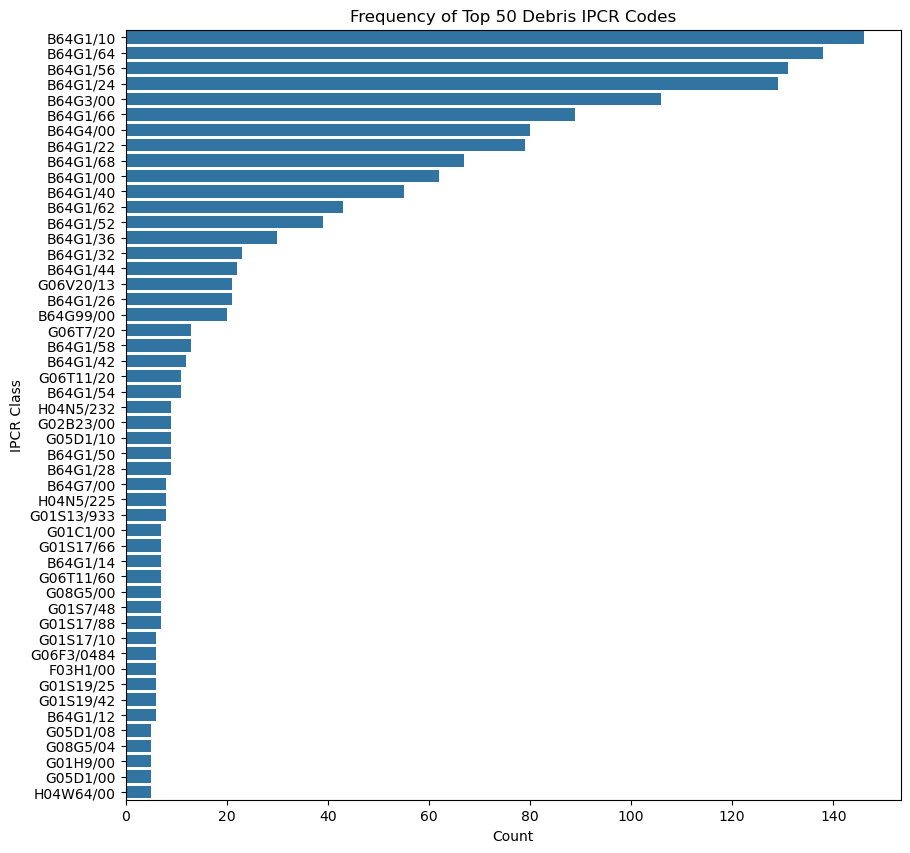

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data from the uploaded file
data = pd.read_excel('Debris Data Full.xlsx', sheet_name='Debris IPCR Joined')

# Clean IPCR Class by removing leading and trailing spaces
data['IPCR Class'] = data['IPCR Class'].str.strip()

# Split multiple IPCR classes into separate rows
data = data.assign(IPCR_Class=data['IPCR Class'].str.split(';')).explode('IPCR_Class')

# Clean IPCR_Class column by removing leading and trailing spaces after splitting
data['IPCR_Class'] = data['IPCR_Class'].str.strip()

# Count of patents by IPCR Class
ipcr_counts = data['IPCR_Class'].value_counts()
print(ipcr_counts)

# Summary Statistics for IPCR Classes per patent
ipcr_per_patent = data.groupby('Application Number')['IPCR_Class'].count()
print(ipcr_per_patent.describe())

# Step 1: Get the top 50 IPCR codes by their counts
top_50_ipcr_codes = data['IPCR_Class'].value_counts().nlargest(50).index

# Step 2: Filter the original data to include only these top 50 IPCR codes
filtered_data = data[data['IPCR_Class'].isin(top_50_ipcr_codes)]

# Step 3: Create the bar chart
plt.figure(figsize=(10, 10))
sns.countplot(y='IPCR_Class', data=filtered_data, order=top_50_ipcr_codes)
plt.title('Frequency of Top 50 Debris IPCR Codes')
plt.xlabel('Count')
plt.ylabel('IPCR Class')
plt.show()

# Patent Trend Visualization

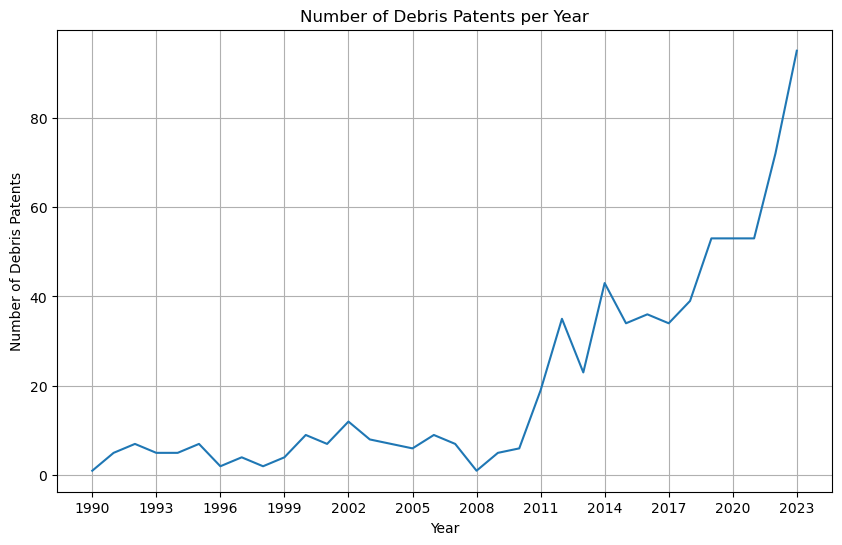

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data from the uploaded file
data = pd.read_excel('Debris Data Full.xlsx', sheet_name='Debris IPCR Joined')

# Filter data between 1960 and 2020
data = data[(data['Publication Year'] >= 1990) & (data['Publication Year'] <= 2023)]

# Number of patents per year
patents_per_year = data.groupby('Publication Year')['Application Number'].nunique()

# Plotting the trend
plt.figure(figsize=(10, 6))
patents_per_year.plot()

# Set x-ticks to show every 5 years from 1985 to 2025
plt.xticks(range(1990, 2024, 3))

plt.title('Number of Debris Patents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Debris Patents')
plt.grid(True)
plt.show()

# Patent Trend Visualization (per country)

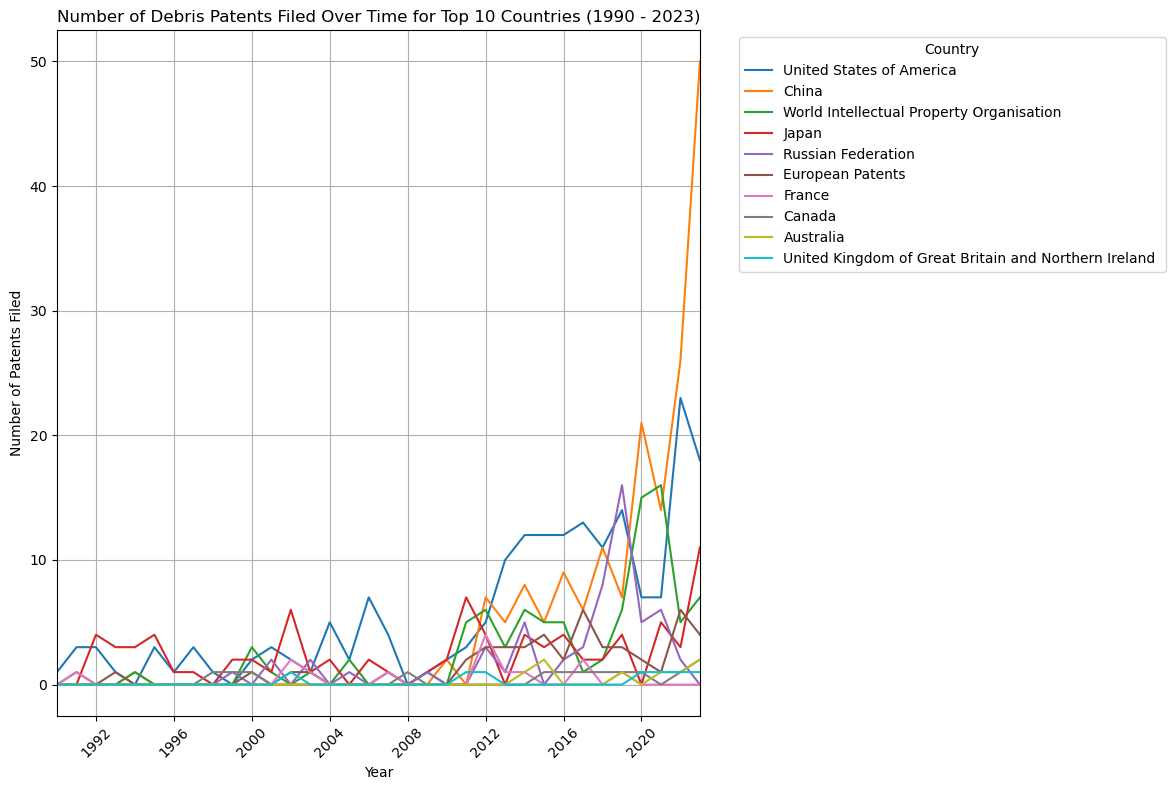

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('Debris Data Full.xlsx', sheet_name='Debris IPCR Joined')

# Convert 'Publication Year' column to datetime format, handling errors
data['Publication Year'] = pd.to_datetime(data['Publication Year'], format='%Y', errors='coerce')

# Drop rows with NaN values in 'Publication Year' column
data = data.dropna(subset=['Publication Year'])

# Set the year boundaries
start_year = 1990
end_year = 2023

# Filter data to include only years within the specified boundary
data = data[(data['Publication Year'].dt.year >= start_year) & (data['Publication Year'].dt.year <= end_year)]

# Group by 'Country Name' and count the total number of patents for each country
country_patent_counts = data['Country Name'].value_counts().head(10)
top_countries = country_patent_counts.index

# Filter data to include only top 10 countries
filtered_data = data[data['Country Name'].isin(top_countries)]

# Group by 'Publication Year' and 'Country Name', then count the number of patents filed each year for each country
patents_per_year_country = filtered_data.groupby(['Publication Year', 'Country Name']).size().unstack(fill_value=0)

# Plot the number of patents filed over time for the top 10 countries
plt.figure(figsize=(12, 8))

for country in top_countries:
    plt.plot(patents_per_year_country.index, patents_per_year_country[country], linestyle='-', label=country)

plt.title('Number of Debris Patents Filed Over Time for Top 10 Countries (1990 - 2023)')
plt.xlabel('Year')
plt.ylabel('Number of Patents Filed')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp(f'{start_year}'), pd.Timestamp(f'{end_year}'))  # Set x-axis limits
plt.tight_layout()
plt.show()

# Distribution of Patents by Countries with >1% patent distribution

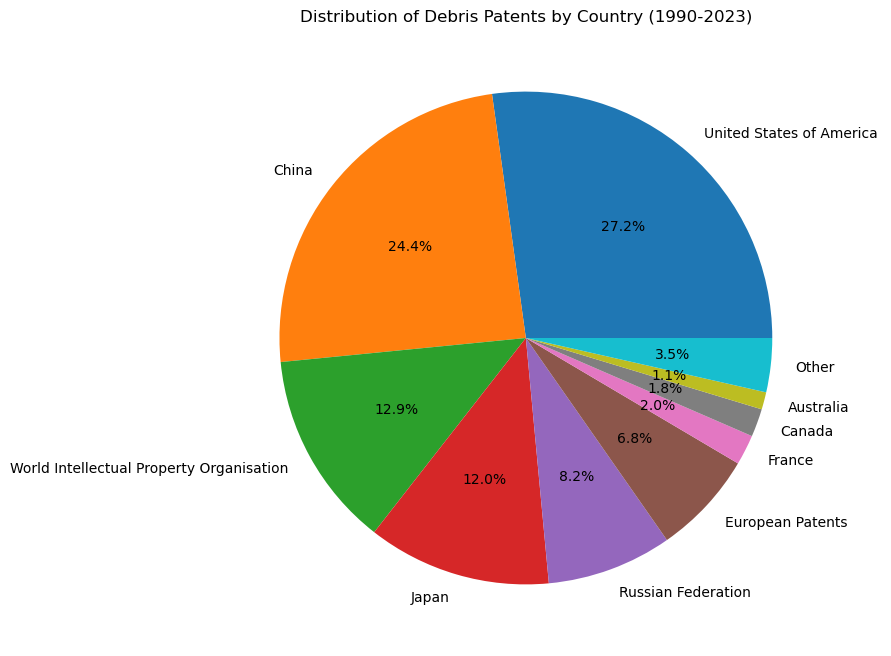

In [22]:
# Load the data
data = pd.read_excel('Debris Data Full.xlsx', sheet_name='Debris IPCR Joined')

# Filter data for the years 2010-2023
start_year = 1990
end_year = 2023
data = data[(data['Publication Year'] >= start_year) & (data['Publication Year'] <= end_year)]

# Clean IPC Code by removing leading and trailing spaces
data['IPCR Class'] = data['IPCR Class'].str.strip()

# Calculate the percentage of patents for each country
country_counts = data['Country Name'].value_counts()
total_patents = country_counts.sum()
country_percentage = (country_counts / total_patents) * 100

# Classify countries with less than 1% as "Other"
country_percentage_modified = country_percentage.copy()
country_percentage_modified[country_percentage < 1] = 0
country_percentage_modified["Other"] = 100 - country_percentage_modified[country_percentage >= 1].sum()

# Filter out zero values for the pie chart
country_percentage_final = country_percentage_modified[country_percentage_modified > 0]

# Plot the pie chart
plt.figure(figsize=(8,8))
country_percentage_final.plot.pie(autopct='%1.1f%%', labels=country_percentage_final.index)
plt.title(f'Distribution of Debris Patents by Country ({start_year}-{end_year})')
plt.ylabel('')  # Hides the y-label to make the chart cleaner
plt.show()

# Top Applicants

     #                              Country Name Country Code Kind  \
0   24                 United States of America            US   B2   
1  100  World Intellectual Property Organisation           WO   A1   
2  108                 United States of America            US   B2   
3  129                 United States of America            US   B2   
4  185  World Intellectual Property Organisation           WO   A1   

         Display Key              Lens ID Publication Date  Publication Year  \
0     US 12033519 B2  098-946-226-385-760       2024-07-09              2024   
1  WO 2024/137555 A1  144-779-879-348-95X       2024-06-27              2024   
2     US 12017803 B2  126-549-807-078-157       2024-06-25              2024   
3     US 12017802 B2  198-058-622-327-896       2024-06-25              2024   
4  WO 2024/126529 A1  126-598-251-266-531       2024-06-20              2024   

  Application Number Application Date  ...  \
0        US 17224445       2021-04-07  ...   
1  US 

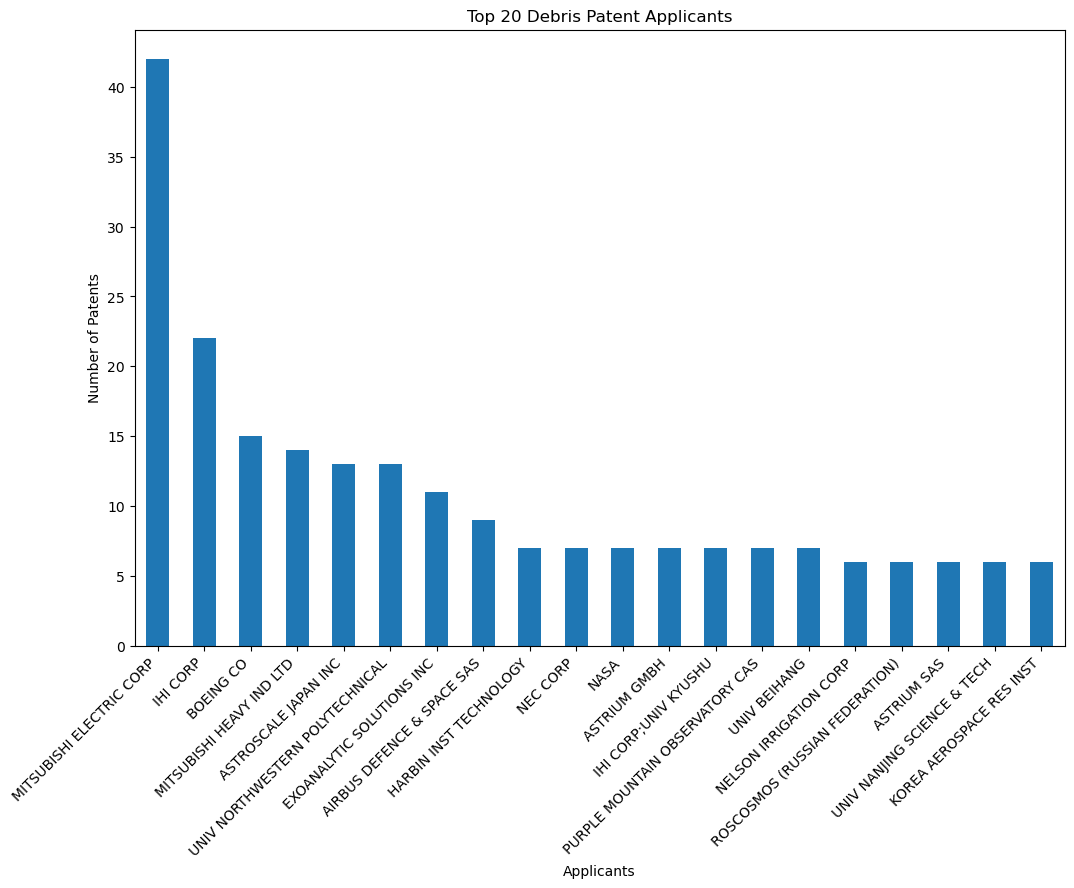

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the Excel file
data = pd.read_excel('Debris Data Full.xlsx', sheet_name='Debris IPCR Joined')

# Display the first few rows to understand the structure
print(data.head())

# Check for missing values in the 'Applicants' column
print(data['Applicants'].isnull().sum())

# Drop rows where 'Applicants' is missing, if any
data = data.dropna(subset=['Applicants'])

# Calculate the frequency of each applicant
applicant_counts = data['Applicants'].value_counts()

# Print the top 10 applicants for inspection
print(applicant_counts.head(10))

# Plot the distribution of the top 20 applicants for better visualization
top_applicants = applicant_counts.head(20)

plt.figure(figsize=(12, 8))
top_applicants.plot(kind='bar')
plt.title('Top 20 Debris Patent Applicants')
plt.xlabel('Applicants')
plt.ylabel('Number of Patents')
plt.xticks(rotation=45, ha='right')
plt.show()


# Top Investors

0
Inventors
MUKAE HISAYUKI                                                   30
BANNO HAJIME                                                     10
OKADA MITSUNOBU                                                  10
HANADA TOSHIYA;KITAZAWA YUKIHITO;KAWABE ARITSUNE                 10
HENDRIX DOUGLAS LEE;THERIEN WILLIAM ALEXANDER                     9
MUKAI HISAYUKI                                                    8
KAWASAKI SHUICHI                                                  7
MARTIN BERNARD;LE BERRE FRANCOIS;CAILLAU DAMIEN;LEVEQUE LOUIS     6
KAPLAN MARSHALL H                                                 6
SESSER GEORGE L;NELSON CRAIG B                                    5
Name: count, dtype: int64


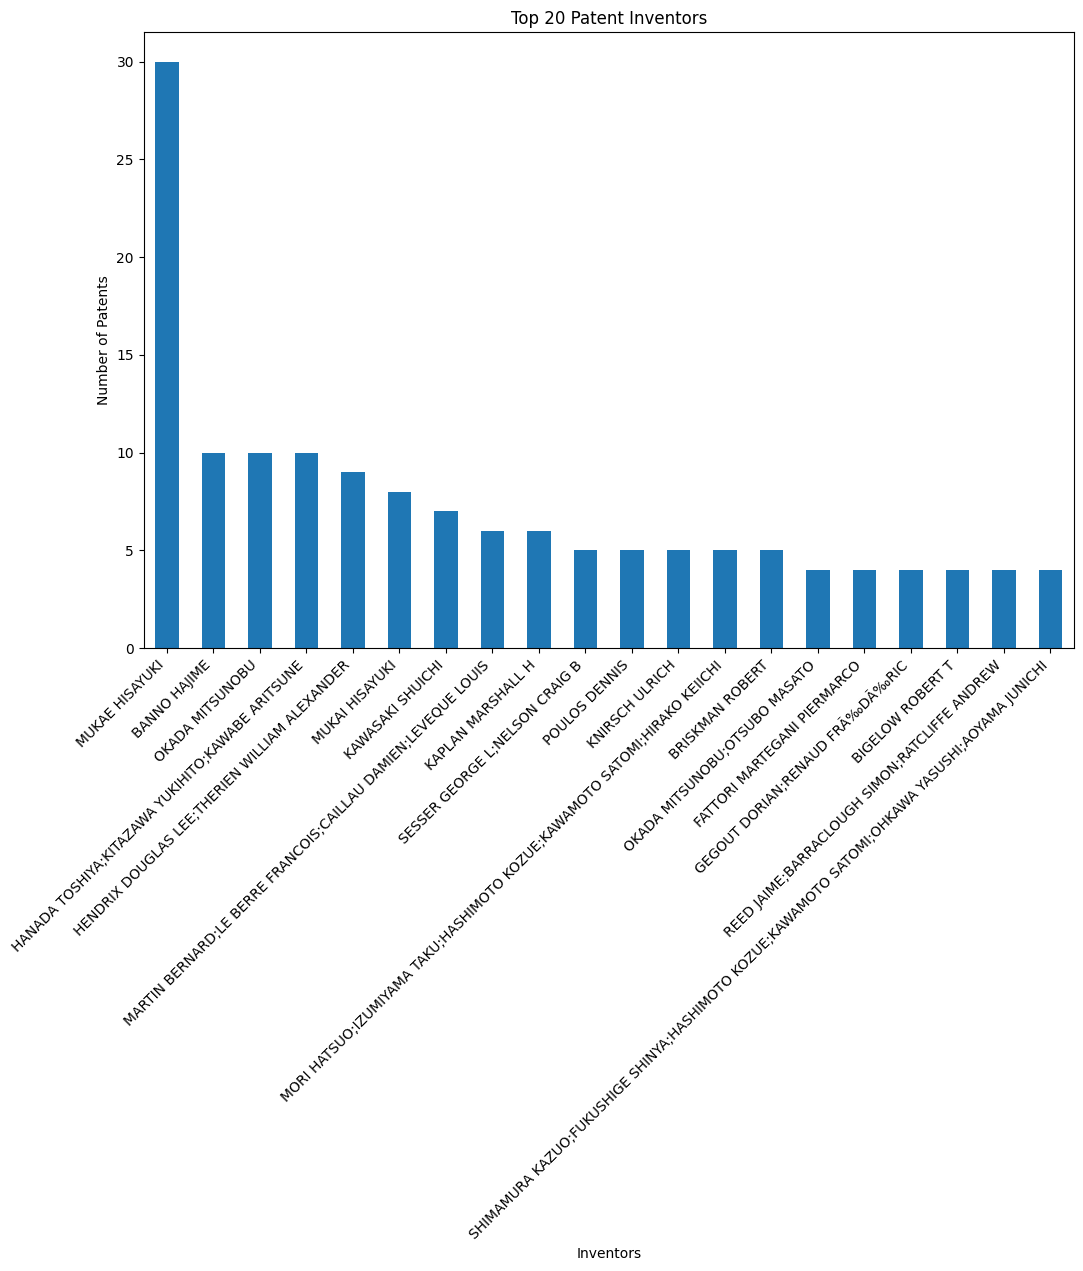

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the Excel file
data = pd.read_excel('Debris Data Full.xlsx', sheet_name='Debris IPCR Joined')

# Display the first few rows to understand the structure
#print(data.head())

# Check for missing values in the 'Inventors' column
print(data['Inventors'].isnull().sum())

# Drop rows where 'Inventors' is missing, if any
data = data.dropna(subset=['Inventors'])

# Calculate the frequency of each inventors
applicant_counts = data['Inventors'].value_counts()

# Print the top 10 inventors for inspection
print(applicant_counts.head(10))

# Plot the distribution of the top 20 Inventors for better visualization
top_inventors = applicant_counts.head(20)

plt.figure(figsize=(12, 8))
top_inventors.plot(kind='bar')
plt.title('Top 20 Patent Inventors')
plt.xlabel('Inventors')
plt.ylabel('Number of Patents')
plt.xticks(rotation=45, ha='right')
plt.show()


# Top Owners

   #                              Country Name Country Code Kind  \
0  1                 United States of America            US   A9   
1  2                 United States of America            US   A1   
2  3                 United States of America            US   A1   
3  4                 United States of America            US   A9   
4  5  World Intellectual Property Organisation           WO   A1   

          Display Key              Lens ID     Publication Date  \
0  US 2024/0228066 A9  108-899-191-216-677  2024-07-11 00:00:00   
1  US 2024/0228070 A1  167-355-931-693-773  2024-07-11 00:00:00   
2  US 2024/0228067 A1  034-637-077-854-787  2024-07-11 00:00:00   
3  US 2024/0228069 A9  021-890-117-341-730  2024-07-11 00:00:00   
4   WO 2024/147165 A1  185-938-618-160-521  2024-07-11 00:00:00   

   Publication Year Application Number     Application Date  ...  \
0              2024        US 18491511  2023-10-20 00:00:00  ...   
1              2024        US 18407967  2024-01-09 0

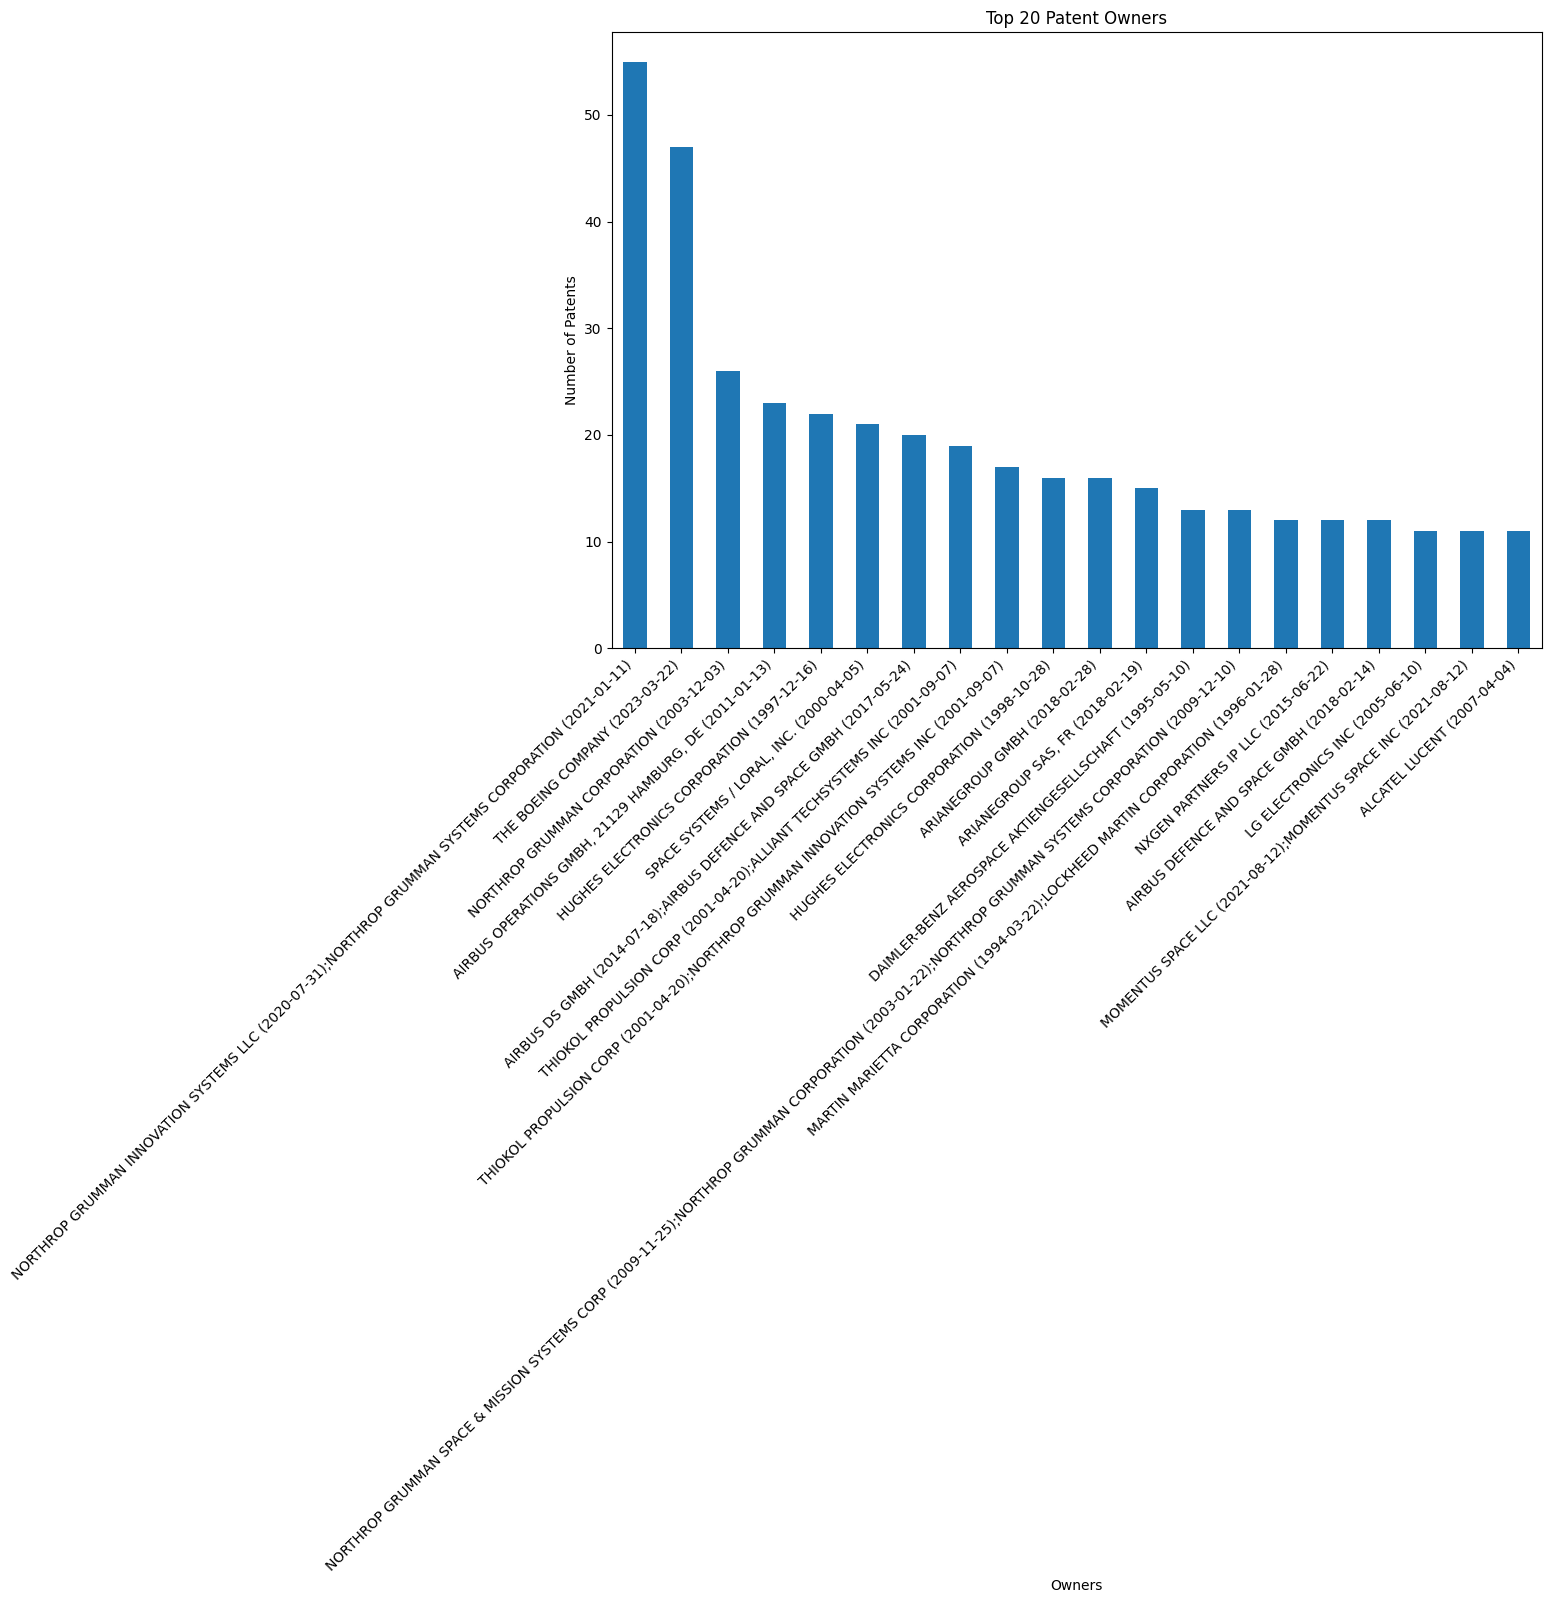

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the Excel file
data = pd.read_excel('B64G-Space Patents.xlsx', sheet_name='Data IPCR Joined')

# Display the first few rows to understand the structure
print(data.head())

# Check for missing values in the 'Owners' column
print(data['Owners'].isnull().sum())

# Drop rows where 'Owners' is missing or blank
data = data.dropna(subset=['Owners'])
data = data[data['Owners'].str.strip() != '']

# Calculate the frequency of each owner
owner_counts = data['Owners'].value_counts()

# Print the top 10 owners for inspection
print(owner_counts.head(10))

# Plot the distribution of the top 20 owners for better visualization
top_owners = owner_counts.head(20)

plt.figure(figsize=(12, 8))
top_owners.plot(kind='bar')
plt.title('Top 20 Patent Owners')
plt.xlabel('Owners')
plt.ylabel('Number of Patents')
plt.xticks(rotation=45, ha='right')
plt.show()


# Patent Document type 

     #                              Country Name Country Code Kind  \
0   24                 United States of America            US   B2   
1  100  World Intellectual Property Organisation           WO   A1   
2  108                 United States of America            US   B2   
3  129                 United States of America            US   B2   
4  185  World Intellectual Property Organisation           WO   A1   

         Display Key              Lens ID Publication Date  Publication Year  \
0     US 12033519 B2  098-946-226-385-760       2024-07-09              2024   
1  WO 2024/137555 A1  144-779-879-348-95X       2024-06-27              2024   
2     US 12017803 B2  126-549-807-078-157       2024-06-25              2024   
3     US 12017802 B2  198-058-622-327-896       2024-06-25              2024   
4  WO 2024/126529 A1  126-598-251-266-531       2024-06-20              2024   

  Application Number Application Date  ...  \
0        US 17224445       2021-04-07  ...   
1  US 

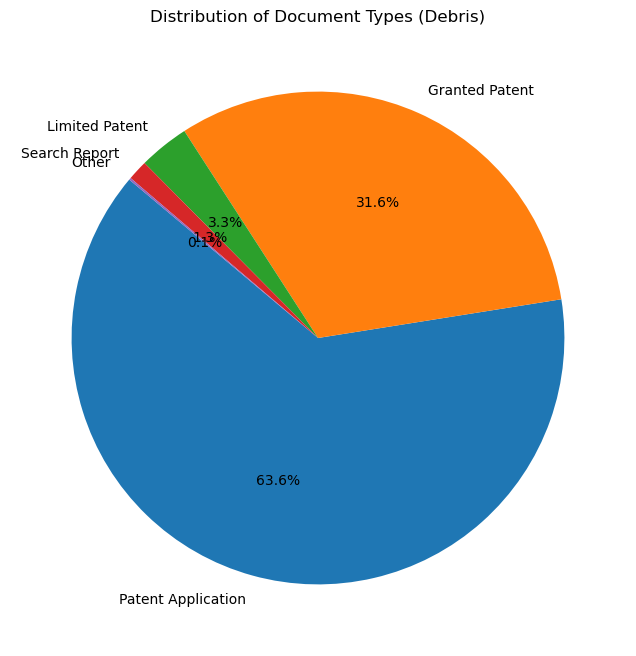

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the Excel file
data = pd.read_excel('Debris Data Full.xlsx', sheet_name='Debris IPCR Joined')

# Display the first few rows to understand the structure
print(data.head())

# Check for missing values in the 'Document Type' column
print(data['Document Type'].isnull().sum())

# Drop rows where 'Document Type' is missing or blank
data = data.dropna(subset=['Document Type'])
data = data[data['Document Type'].str.strip() != '']

# Calculate the frequency of each document type
document_type_counts = data['Document Type'].value_counts()

# If there are too many document types, group the less common ones as 'Other'
threshold = 1  # Minimum percentage to be included in the pie chart
document_type_percentage = (document_type_counts / document_type_counts.sum()) * 100
document_type_counts_filtered = document_type_counts[document_type_percentage >= threshold]
document_type_counts_filtered['Other'] = document_type_counts[document_type_percentage < threshold].sum()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(document_type_counts_filtered, labels=document_type_counts_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Document Types (Debris)')
plt.show()


# IPCR Code Heatmap

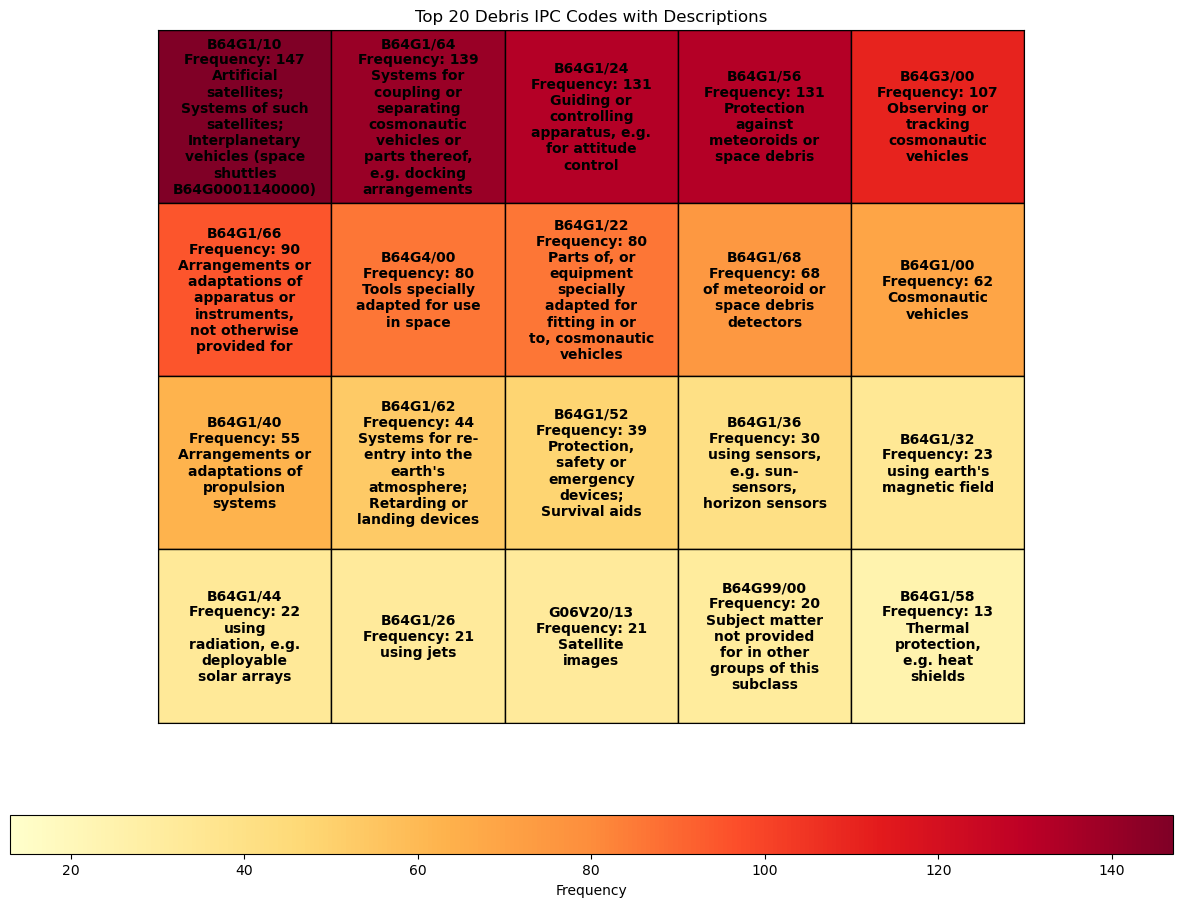

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import numpy as np

# Load the data from the main sheet
data = pd.read_excel('Debris Data Full.xlsx', sheet_name='Debris')

# Combine all IPCR columns into a single series
ipcr_columns = [f'IPCR Class {i}' for i in range(1, 31)]
all_ipcr_codes = data[ipcr_columns].values.flatten()

# Count the frequency of each IPCR code
ipcr_counts = pd.Series(all_ipcr_codes).value_counts()

# Get the top 20 IPCR codes
top_20_ipcr = ipcr_counts.head(20)

# Load the IPCR Index sheet
ipcr_index = pd.read_excel('Debris Data Full.xlsx', sheet_name='IPCR Index')

# Clean column names to remove extra spaces if necessary
ipcr_index.columns = ipcr_index.columns.str.strip()

# Create a DataFrame for the top 20 IPCR codes
top_20_ipcr_df = top_20_ipcr.reset_index()
top_20_ipcr_df.columns = ['IPCR Code', 'Frequency']

# Perform the merge operation using correct column names
try:
    merged_data = pd.merge(
        top_20_ipcr_df, 
        ipcr_index, 
        left_on='IPCR Code', 
        right_on='IPCR short codes', 
        how='left'
    )
except KeyError as e:
    print(f"KeyError: {e}")
    print("Verify the column names and try again.")
    raise

# Prepare data for visualization
grid_data = merged_data[['IPCR Code', 'Frequency', 'Description']]

# Define the number of rows and columns for the grid
num_rows = 4
num_cols = 5

# Create a color map ranging from yellow to red
cmap = sns.color_palette("YlOrRd", as_cmap=True)

# Define text wrapping function
def wrap_text(text, width=15):
    if isinstance(text, str):
        return "\n".join(textwrap.wrap(text, width=width))
    else:
        return "No Description"

# Create the grid chart
fig, ax = plt.subplots(figsize=(15, 12))

# Plot each IPCR code and description in its respective cell
for i in range(len(grid_data)):
    row = i // num_cols
    col = i % num_cols
    frequency = grid_data.iloc[i]['Frequency']
    ipcr_code = grid_data.iloc[i]['IPCR Code']
    description = grid_data.iloc[i].get('Description', 'No Description')

    # Format the text for the cell
    wrapped_description = wrap_text(description, width=15)
    text = f'{ipcr_code}\nFrequency: {frequency}\n{wrapped_description}'
    
    # Define the rectangle and text for each cell
    cell_color = cmap(frequency / grid_data['Frequency'].max())  # Normalize frequency for color map
    
    # Draw the rectangle for each cell
    rect = plt.Rectangle((col, num_rows - row - 1), 1, 1, color=cell_color, ec='black')
    ax.add_patch(rect)
    
    # Add the text inside the cell
    plt.text(col + 0.5, num_rows - row - 0.5, 
             text, 
             ha='center', va='center', fontsize=10, fontweight='bold')

# Add a color bar (legend) at the bottom of the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=grid_data['Frequency'].min(), vmax=grid_data['Frequency'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=30)
cbar.set_label('Frequency')
cbar.ax.tick_params(labelsize=10)

# Customize the plot
ax.set_xlim(0, num_cols)
ax.set_ylim(0, num_rows)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

plt.title('Top 20 Debris IPC Codes with Descriptions')
plt.grid(False)
plt.show()

# Cites by Patent Chart

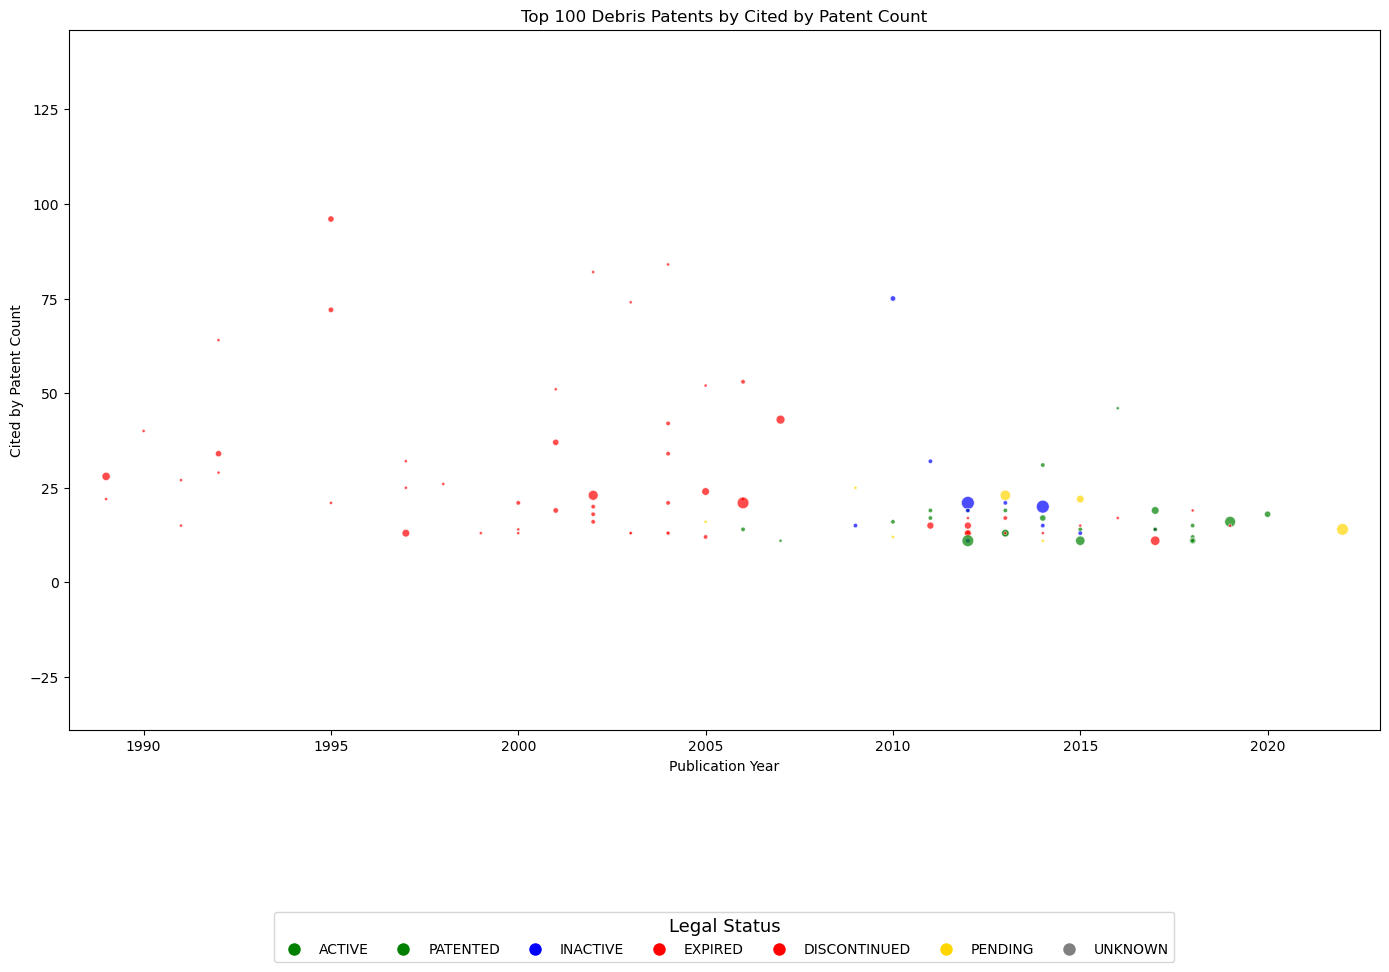

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
data = pd.read_excel('Debris Data Full.xlsx', sheet_name='Debris IPCR Joined')

# Extract relevant columns
df_filtered = data[['Publication Year', 'Cited by Patent Count', 'Legal Status', 'Simple Family Size']]

# Drop rows with missing values in these columns
df_filtered = df_filtered.dropna()

# Convert 'Publication Year' to numeric, if not already
df_filtered['Publication Year'] = pd.to_numeric(df_filtered['Publication Year'], errors='coerce')

# Sort and select top 100 patents by 'Cited by Patent Count'
top_100_df = df_filtered.nlargest(100, 'Cited by Patent Count')

# Define the color mapping for Legal Status
status_colors = {
    'ACTIVE': 'green',
    'PATENTED': 'green',
    'INACTIVE': 'blue',
    'EXPIRED': 'red',
    'DISCONTINUED': 'red',
    'PENDING': 'gold',
    'UNKNOWN': 'grey'
}

# Map colors based on Legal Status
top_100_df['Color'] = top_100_df['Legal Status'].map(status_colors).fillna('grey')  # Default to grey for unknown statuses

# Set transparency parameter
transparency = 0.7  # Adjust transparency here (0.0 = fully transparent, 1.0 = fully opaque)

# Normalize Simple Family Size for bubble sizes (to fit a reasonable range)
size_scale_factor = 5  # Adjust this factor as needed
top_100_df['Bubble Size'] = top_100_df['Simple Family Size'] * size_scale_factor

# Create the bubble chart
plt.figure(figsize=(14, 10))  # Adjust the figure size for better visualization
bubble = plt.scatter(
    top_100_df['Publication Year'], 
    top_100_df['Cited by Patent Count'], 
    s=top_100_df['Bubble Size'],  # Bubble size based on Simple Family Size
    alpha=transparency,     # Use transparency parameter
    c=top_100_df['Color'],  # Use color mapping based on Legal Status
    edgecolor='w', # Edge color of bubbles
    linewidth=0.5  # Edge line width
)

# Set x and y-axis limits manually to ensure proper scaling
plt.xlim(top_100_df['Publication Year'].min() - 1, top_100_df['Publication Year'].max() + 1)
plt.ylim(top_100_df['Cited by Patent Count'].min() - 50, top_100_df['Cited by Patent Count'].max() + 50)

# Set plot titles and labels
plt.title('Top 100 Debris Patents by Cited by Patent Count')
plt.xlabel('Publication Year')
plt.ylabel('Cited by Patent Count')

# Remove grid lines
plt.grid(False)

# Create a legend for the Legal Status colors
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=status_colors[status], markersize=10) for status in status_colors]
plt.legend(
    handles, 
    status_colors.keys(), 
    title='Legal Status', 
    bbox_to_anchor=(0.5, -0.25),  # Position the legend below the plot
    loc='upper center', 
    ncol=len(status_colors),  # Place all legend items in a single row
    title_fontsize='13',  # Font size for the legend title
    fontsize='10',  # Font size for the legend items
    columnspacing=1.5  # Space between columns
)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()


# Cites Patent Count

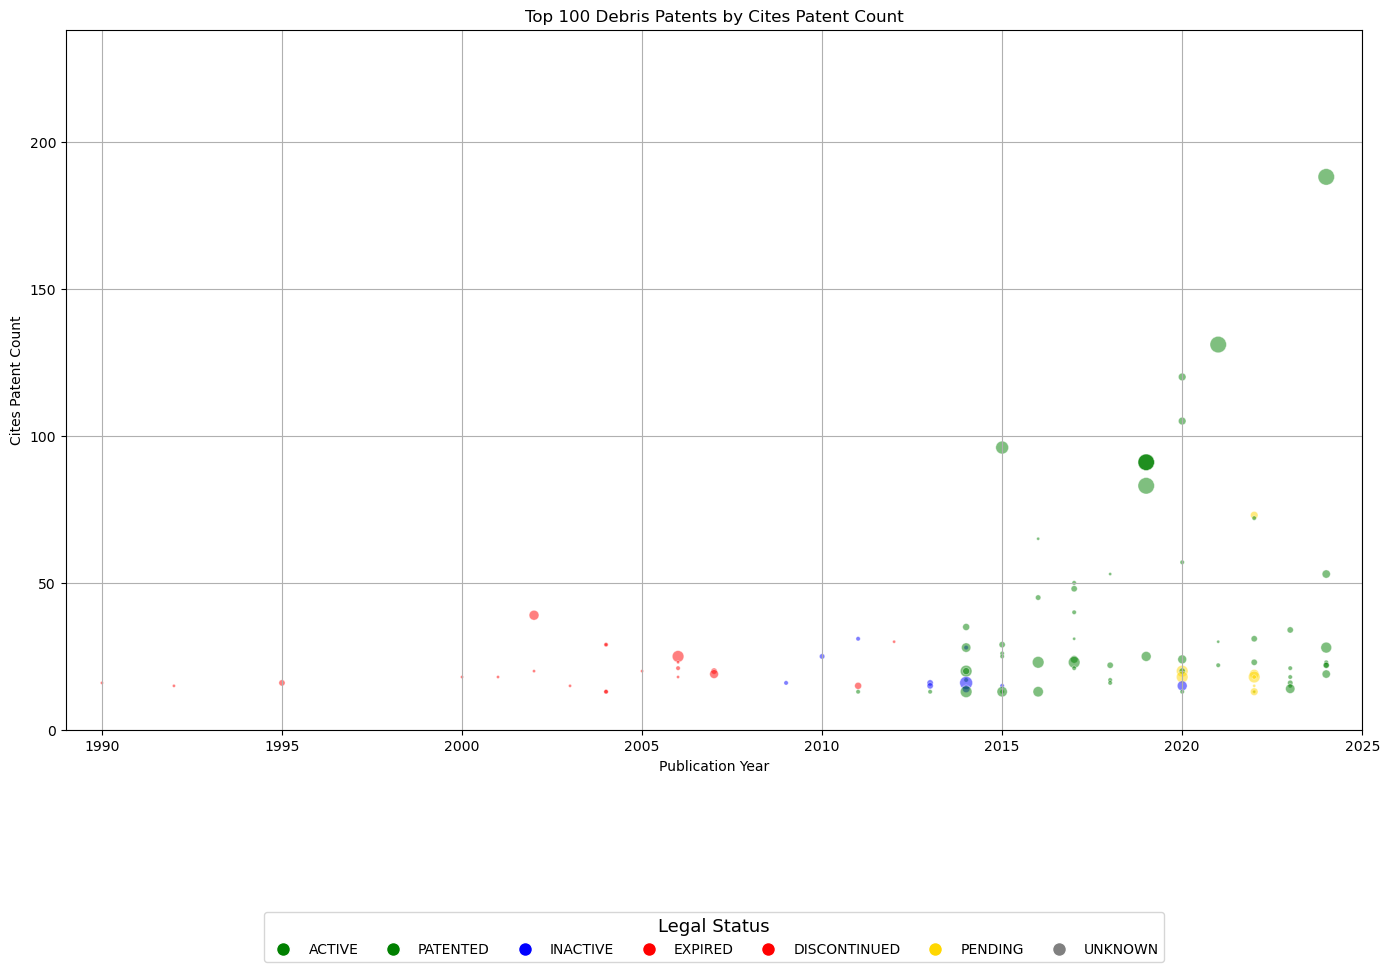

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
data = pd.read_excel('Debris Data Full.xlsx', sheet_name='Debris IPCR Joined')

# Extract relevant columns
df_filtered = data[['Publication Year', 'Cites Patent Count', 'Legal Status', 'Simple Family Size']]

# Drop rows with missing values in these columns
df_filtered = df_filtered.dropna()

# Convert 'Publication Year' to numeric, if not already
df_filtered['Publication Year'] = pd.to_numeric(df_filtered['Publication Year'], errors='coerce')

# Sort and select top 100 patents by 'Cites Patent Count'
top_100_df = df_filtered.nlargest(100, 'Cites Patent Count')

# Define the color mapping for Legal Status
status_colors = {
    'ACTIVE': 'green',
    'PATENTED': 'green',
    'INACTIVE': 'blue',
    'EXPIRED': 'red',
    'DISCONTINUED': 'red',
    'PENDING': 'gold',
    'UNKNOWN': 'grey'
}

# Map colors based on Legal Status
top_100_df['Color'] = top_100_df['Legal Status'].map(status_colors).fillna('grey')  # Default to grey for unknown statuses

# Set transparency parameter
transparency = 0.5  # Adjust transparency here (0.0 = fully transparent, 1.0 = fully opaque)

# Normalize Simple Family Size for bubble sizes (to fit a reasonable range)
size_scale_factor = 5  # Adjust this factor as needed
top_100_df['Bubble Size'] = top_100_df['Simple Family Size'] * size_scale_factor

# Create the bubble chart
plt.figure(figsize=(14, 10))  # Adjust the figure size for better visualization
bubble = plt.scatter(
    top_100_df['Publication Year'], 
    top_100_df['Cites Patent Count'], 
    s=top_100_df['Bubble Size'],  # Bubble size based on Simple Family Size
    alpha=transparency,     # Use transparency parameter
    c=top_100_df['Color'],  # Use color mapping based on Legal Status
    edgecolor='w', # Edge color of bubbles
    linewidth=0.5  # Edge line width
)

# Set x and y-axis limits manually to ensure proper scaling
plt.xlim(top_100_df['Publication Year'].min() - 1, top_100_df['Publication Year'].max() + 1)
plt.ylim(0, top_100_df['Cites Patent Count'].max() + 50)

# Set plot titles and labels
plt.title('Top 100 Debris Patents by Cites Patent Count')
plt.xlabel('Publication Year')
plt.ylabel('Cites Patent Count')

# Remove grid lines
plt.grid(True)

# Create a legend for the Legal Status colors
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=status_colors[status], markersize=10) for status in status_colors]
plt.legend(
    handles, 
    status_colors.keys(), 
    title='Legal Status', 
    bbox_to_anchor=(0.5, -0.25),  # Position the legend below the plot
    loc='upper center', 
    ncol=len(status_colors),  # Place all legend items in a single row
    title_fontsize='13',  # Font size for the legend title
    fontsize='10',  # Font size for the legend items
    columnspacing=1.5  # Space between columns
)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()
